# Demo
### To try out the basic functionallities of our quality control tool for scATACseq.

##### 1. import the modules utils and plot from the src directory

In [1]:
import src.utils as utils
import src.plot as plot

##### 2. load a .bed file, calculate single cell quality controll parameters and save them into a dataframe

In [2]:
path = './quickstart/test.bed'
df = utils.load_data(path) 

loading fragments...
calculate distribution...
calculate maxima...
calculate score...


In [3]:
df

,Mean,Median,Fragments,Fragment-Count,Distribution,Maxima,Maxima-Count,Score
AAACGCAAGCAAACCCGAGATA,163.14,153,"[32, 47, 311, 45, 153, 393, 161]",7,"[1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","[1, 8, 18, 24]",4,122.174192
AAACGCAAGCAAACCTAAGTGG,107.0,62,"[272, 62, 112, 33, 56]",5,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 16]",2,124.496881
AAACGCAAGCAAACGGATCAGT,99.33,65.5,"[210, 56, 28, 42, 185, 75]",6,"[2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",[0],1,197.571162
AAACGCAAGCAAACGTCCCGTT,104.67,49,"[45, 33, 49, 227, 80, 94, 36, 340, 38]",9,"[3, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 13, 20]",3,107.453741
AAACGCAAGCAAACTAGCCCTA,204.0,85,"[48, 479, 85]",3,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],0,inf


##### 3. plot the distributions of the qc parameters as histogram and/or violin plot

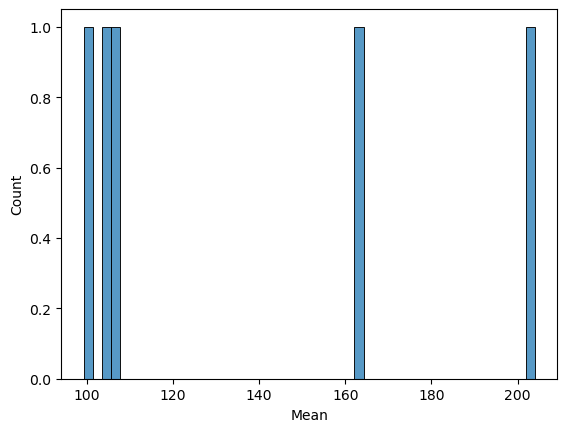

In [4]:
plot.histplt(df, column_name = 'Mean')

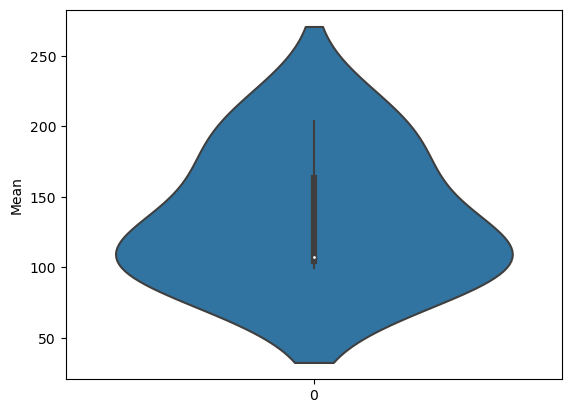

In [5]:
plot.vioplt(df, column_name = 'Mean')

##### 4. compare the distribution of different qc parameters in a scatterplot

/home/stud1/.conda/envs/testn/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/stud1/.conda/envs/testn/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/stud1/.conda/envs/testn/lib/python3.9/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


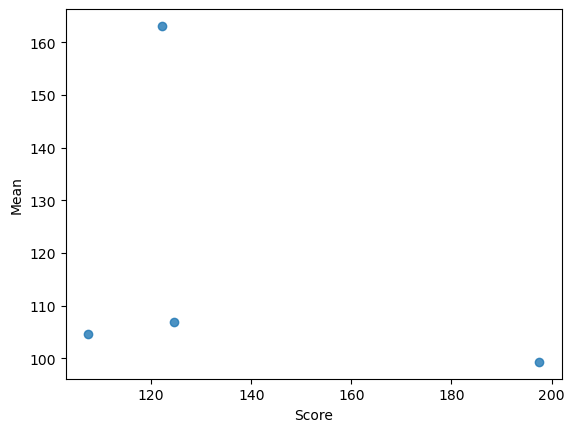

In [6]:
plot.compplt(df, column_name_1 = 'Score', column_name_2 = 'Mean')

##### 5. bin cells by different qc parameters and plot fragment length distributions of these slices

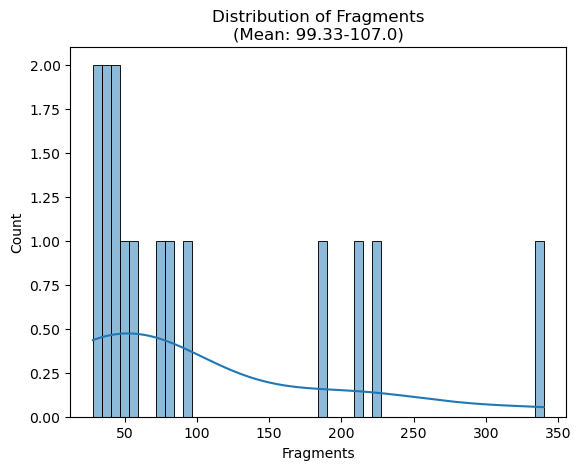

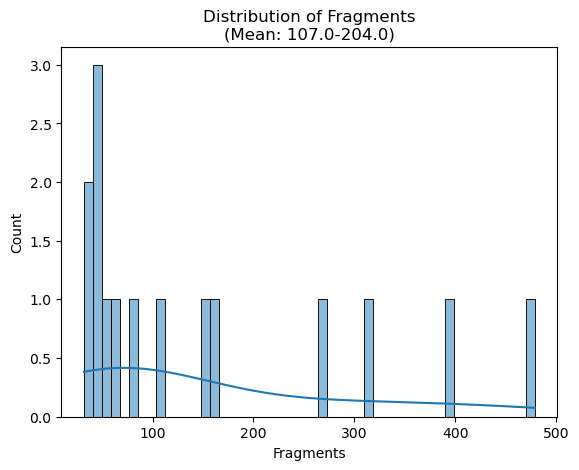

In [7]:
plot.bindistplt(df, column_name = 'Mean', bins = 2, mode = 'equal')

##### 6. take a closer look at those slices by plotting the fragment length distribution of single cells

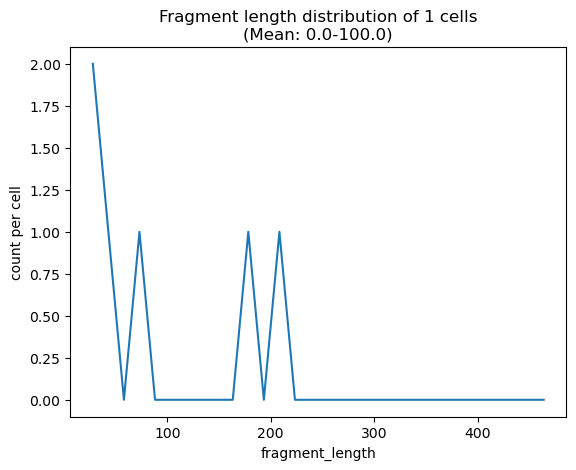

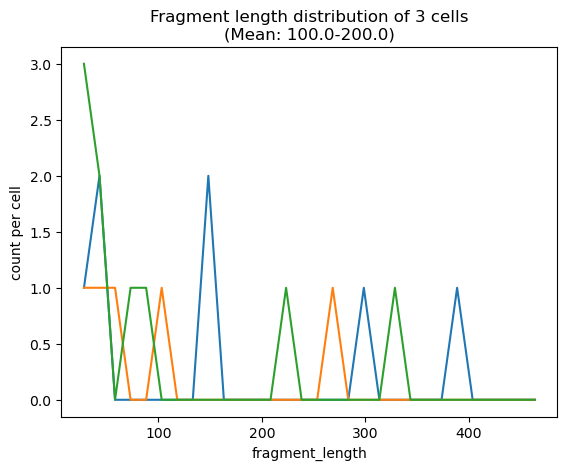

In [8]:
plot.multiplt(df, column_name = 'Mean', bins = 2, lower_limit = 0, upper_limit = 200, mode = 'base')

#####  optionally filter dataframe by individual threshold(s)

In [9]:
df_mean100 = df[df['Mean']<100]

##### 7. output full or filtered dataframe as .h5ad file

In [10]:
output_path = './quickstart/test_filtered.h5ad'
utils.output_h5ad(df_mean100, output = output_path)